# The Power of Two Choices

http://web.stanford.edu/class/cs168/p1.pdf

In [1]:
# Mostly borrowed from http://web.stanford.edu/class/cs168/histogram.py

import numpy as np 
import matplotlib.pyplot as plt

N_BUCKETS = 200000
N_EXPERIMENTS = 30

def plot_histogram(bins, filename = None):
    """
    This function wraps a number of hairy matplotlib calls to smooth the plotting 
    part of this assignment.

    Inputs:
    - bins: numpy array of shape max_bin_population X num_strategies numpy array. For this 
            assignment this must be 200000 X 4. 
            WATCH YOUR INDEXING! The element bins[i,j] represents the number of times the most 
            populated bin has i+1 balls for strategy j+1. 
    """
    assert bins.shape == (N_BUCKETS, 4), "Input bins must be a numpy array of shape (max_bin_population, num_strategies)"
    assert np.array_equal(np.sum(bins, axis = 0),(np.array([N_EXPERIMENTS,N_EXPERIMENTS,N_EXPERIMENTS,N_EXPERIMENTS]))), "There must be 30 runs for each strategy"

    thresh =  max(np.nonzero(bins)[0])+3
    n_bins = thresh
    bins = bins[:thresh,:]
    print("\nPLOTTING: Removed empty tail. Only the first non-zero bins will be plotted\n")

    ind = np.arange(n_bins) 
    width = 1.0/6.0

    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    rects_strat_1 = ax.bar(ind + width, bins[:,0], width, color='yellow')
    rects_strat_2 = ax.bar(ind + width*2, bins[:,1], width, color='orange')
    rects_strat_3 = ax.bar(ind + width*3, bins[:,2], width, color='red')
    rects_strat_4 = ax.bar(ind + width*4, bins[:,3], width, color='k')

    ax.set_ylabel('Number Occurrences in 30 Runs')
    ax.set_xlabel('Number of Balls In The Most Populated Bin')
    ax.set_title('Histogram: Load on Most Populated Bin For Each Strategy')

    ax.set_xticks(ind)
    ax.set_xticks(ind+width*3, minor = True)
    ax.set_xticklabels([str(i) for i in range(0,n_bins)], minor = True)
    ax.tick_params(axis=u'x', which=u'minor',length=0)

    ax.legend((rects_strat_1[0], rects_strat_2[0], rects_strat_3[0], rects_strat_4[0]), ('Strategy 1', 'Strategy 2', 'Strategy 3', 'Strategy 4'))
    plt.setp(ax.get_xmajorticklabels(), visible=False)
    
    plt.show()


PLOTTING: Removed empty tail. Only the first non-zero bins will be plotted



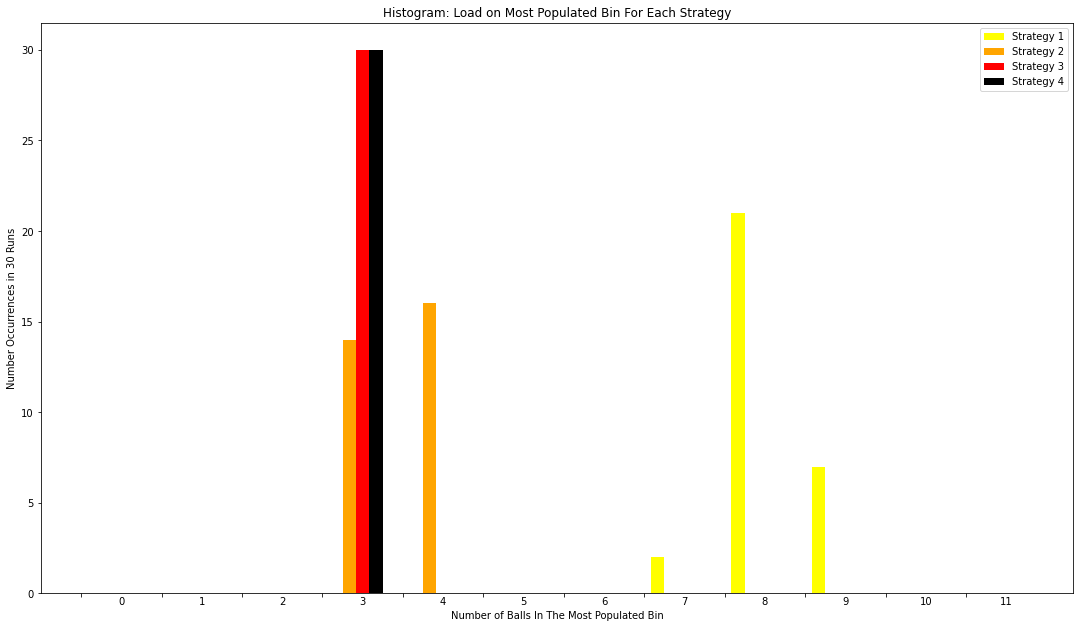

In [2]:
from random import randrange

def strategy1():
    """
    Select one of the N bins uniformly at random,
    and place the current ball in it.
    
    Fast insertion, but the least even distribution of all strategies. 
    """
    buckets = np.empty(N_BUCKETS, dtype=int)
    buckets.fill(0)

    for _ in range(N_BUCKETS):
        bucket = randrange(N_BUCKETS)
        buckets[bucket] += 1
    
    return np.max(buckets)

def strategy2():
    """
    Select two of the N bins uniformly at random (either with or without replacement),
    and look at how many balls are already in each.
    If one bin has strictly fewer balls than the other, place the current ball in that bin.
    If both bins have the same number of balls,
    pick one of the two at random and place the current ball in it.
    
    Rather good distribution; slower but not too slow insertion.
    """
    buckets = np.empty(N_BUCKETS, dtype=int)
    buckets.fill(0)

    for _ in range(N_BUCKETS):
        bucket1 = randrange(N_BUCKETS)
        bucket2 = randrange(N_BUCKETS)
        if buckets[bucket1] < buckets[bucket2]:
            dest = bucket1
        elif buckets[bucket2] < buckets[bucket1]:
            dest = bucket2
        else:
            tiebreak = randrange(2)
            dest = bucket1 if tiebreak == 0 else bucket2
        buckets[dest] += 1
    
    return np.max(buckets)

def strategy3():
    """
    Same as the previous strategy, except choosing three bins at random rather than two.
    
    Very smooth distribution, but the slowest insertion.
    """
    buckets = np.empty(N_BUCKETS, dtype=int)
    buckets.fill(0)

    for _ in range(N_BUCKETS):
        picked = sorted([randrange(N_BUCKETS), randrange(N_BUCKETS), randrange(N_BUCKETS)], key=lambda b: buckets[b])
        if buckets[picked[0]] < buckets[picked[1]]:
            # Single winner
            dest = picked[0]
        elif buckets[picked[0]] < buckets[picked[2]]:
            # 2-way tie
            dest = picked[randrange(2)]
        else:
            # 3-way tie
            dest = picked[randrange(3)]
        buckets[dest] += 1
    
    return np.max(buckets)

def strategy4():
    """
    Select two bins as follows: the first bin is selected uniformly from the first N/2 bins,
    and the second uniformly from the last N/2 bins. (You can assume that N is even.)
    If one bin has strictly fewer balls than the other, place the current ball in that bin.
    If both bins have the same number of balls, place the current ball (deterministically) in the first
    of the two bins.
    
    Very smooth distribution, ok insertion.
    
    No idea why it works so well. Intuitively, it should be strictly worse than strategy2,
    but it is in fact a lot better.
    """
    buckets = np.empty(N_BUCKETS, dtype=int)
    buckets.fill(0)

    for _ in range(N_BUCKETS):
        bucket1 = randrange(int(N_BUCKETS / 2))
        bucket2 = int(N_BUCKETS / 2) + randrange(int(N_BUCKETS / 2))
        if buckets[bucket1] < buckets[bucket2]:
            dest = bucket1
        elif buckets[bucket2] < buckets[bucket1]:
            dest = bucket2
        else:
            dest = bucket1
        buckets[dest] += 1
    
    return np.max(buckets)

def to_input(f, desc=""):
    hist = np.empty(N_BUCKETS)
    hist.fill(0)
    for i in range(N_EXPERIMENTS):
        x = f()
        hist[x] += 1
    return hist

plot_histogram(np.array([to_input(strategy1, "1"), to_input(strategy2, "2"), to_input(strategy3, "3"), to_input(strategy4, "4")]).transpose())